In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Exploratory Data Analysis

## CATEGORIES

### Load and View Data

In [189]:
df=pd.read_csv(r"C:\Users\hajar\Time-Series-Crime-Forecasting-Minneapolis-3\data\Clean_Data.csv")

df

,Date,Year,Month,Time,Offense_Category,NIBRS_Crime_Against,Ward,Crime_Count
0,2019-01-01,2019,1,07:53:00,Assault Offenses,Person,10.0,1
1,2019-01-04,2019,1,10:07:00,Destruction/Damage/Vandalism of Property,Property,3.0,1
2,2019-01-01,2019,1,03:23:00,Destruction/Damage/Vandalism of Property,Property,1.0,1
3,2019-01-02,2019,1,04:04:00,Larceny/Theft Offenses,Property,1.0,1
4,2019-01-04,2019,1,05:27:00,Stolen Property Offenses,Property,4.0,1
...,...,...,...,...,...,...,...,...
264089,2025-03-06,2025,3,21:19:00,Larceny/Theft Offenses,Property,10.0,1
264090,2025-03-07,2025,3,13:04:00,Larceny/Theft Offenses,Property,12.0,1
264091,2025-03-08,2025,3,11:57:00,Destruction/Damage/Vandalism of Property,Property,8.0,1
264092,2025-03-10,2025,3,11:44:00,Larceny/Theft Offenses,Property,8.0,1


### Plotting Across wards
Stacked Bar Plot

Text(0, 0.5, 'Number of Reported Crimes\n')

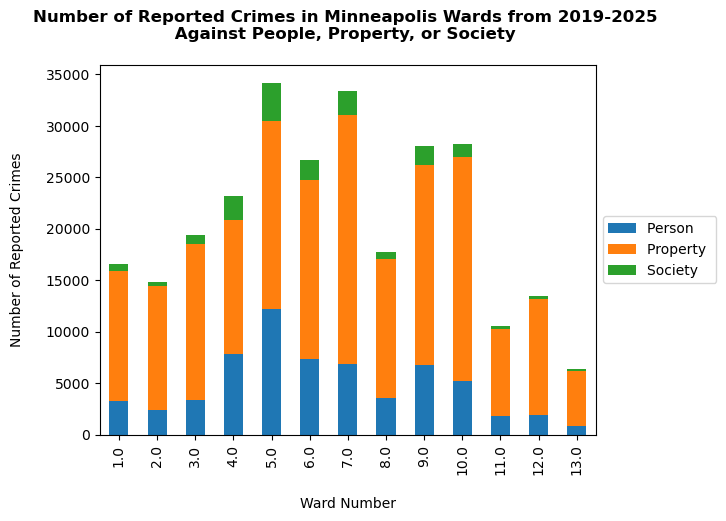

In [190]:

df_counts = df.groupby(['Ward','NIBRS_Crime_Against'])['Crime_Count'].sum().unstack(fill_value=0)
ax= df_counts.plot(kind='bar',stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("Number of Reported Crimes in Minneapolis Wards from 2019-2025 \n Against People, Property, or Society  \n",weight='bold')
ax.set_xlabel("\nWard Number")
ax.set_ylabel("Number of Reported Crimes\n")

### Plotting the distribution of offenses 
Bar plot

Text(0, 0.5, 'Offense Category')

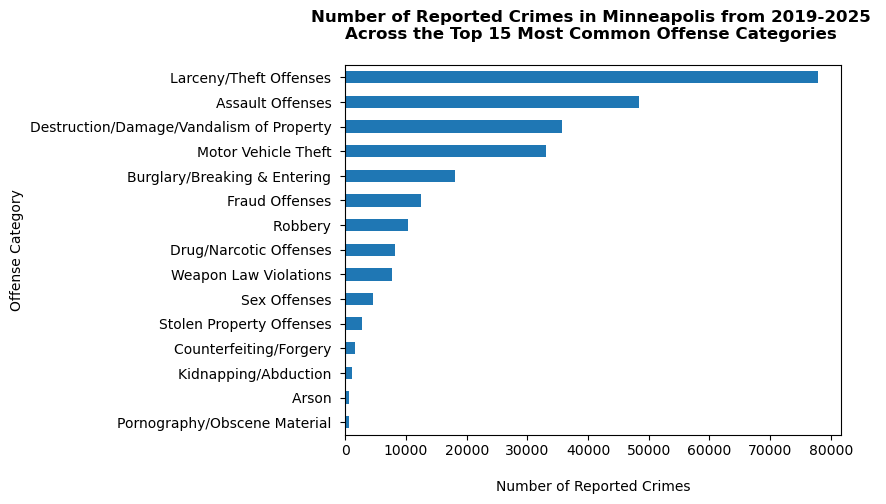

In [191]:
#FIX PLOT
#ax=df.groupby('Offense_Category')['Crime_Count'].sum().sort_values().plot(kind='barh')
ax= df.Offense_Category.value_counts()[:15].sort_values().plot(kind = 'barh')
ax.set_title("Number of Reported Crimes in Minneapolis from 2019-2025 \nAcross the Top 15 Most Common Offense Categories \n",weight='bold')
ax.set_xlabel("\nNumber of Reported Crimes")
ax.set_ylabel("Offense Category")

## TIME

In [192]:
dates=pd.read_csv(r"C:\Users\hajar\Time-Series-Crime-Forecasting-Minneapolis-3\data\Univ_Date.csv")

### Plotting the crime counts across Month

Text(0, 0.5, '\nNumber of Reported Crimes\n')

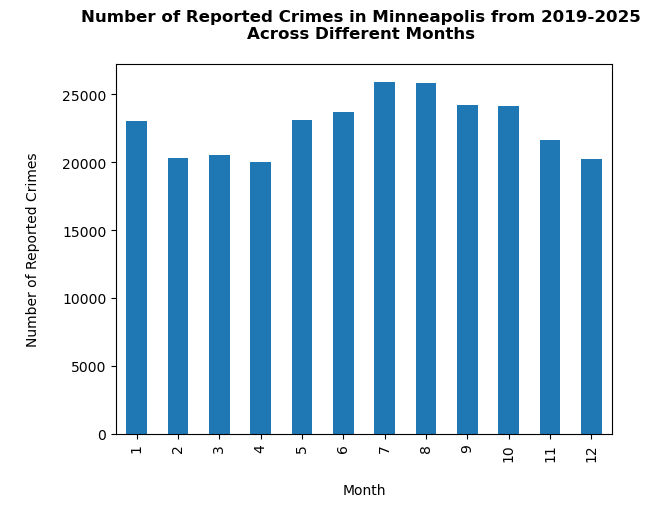

In [193]:
ax=df.groupby('Month')['Crime_Count'].sum().plot(kind='bar')
ax.set_title("Number of Reported Crimes in Minneapolis from 2019-2025 \nAcross Different Months \n",weight='bold')
ax.set_xlabel("\nMonth")
ax.set_ylabel("\nNumber of Reported Crimes\n")

### Plotting the crime by date  (time series plot)

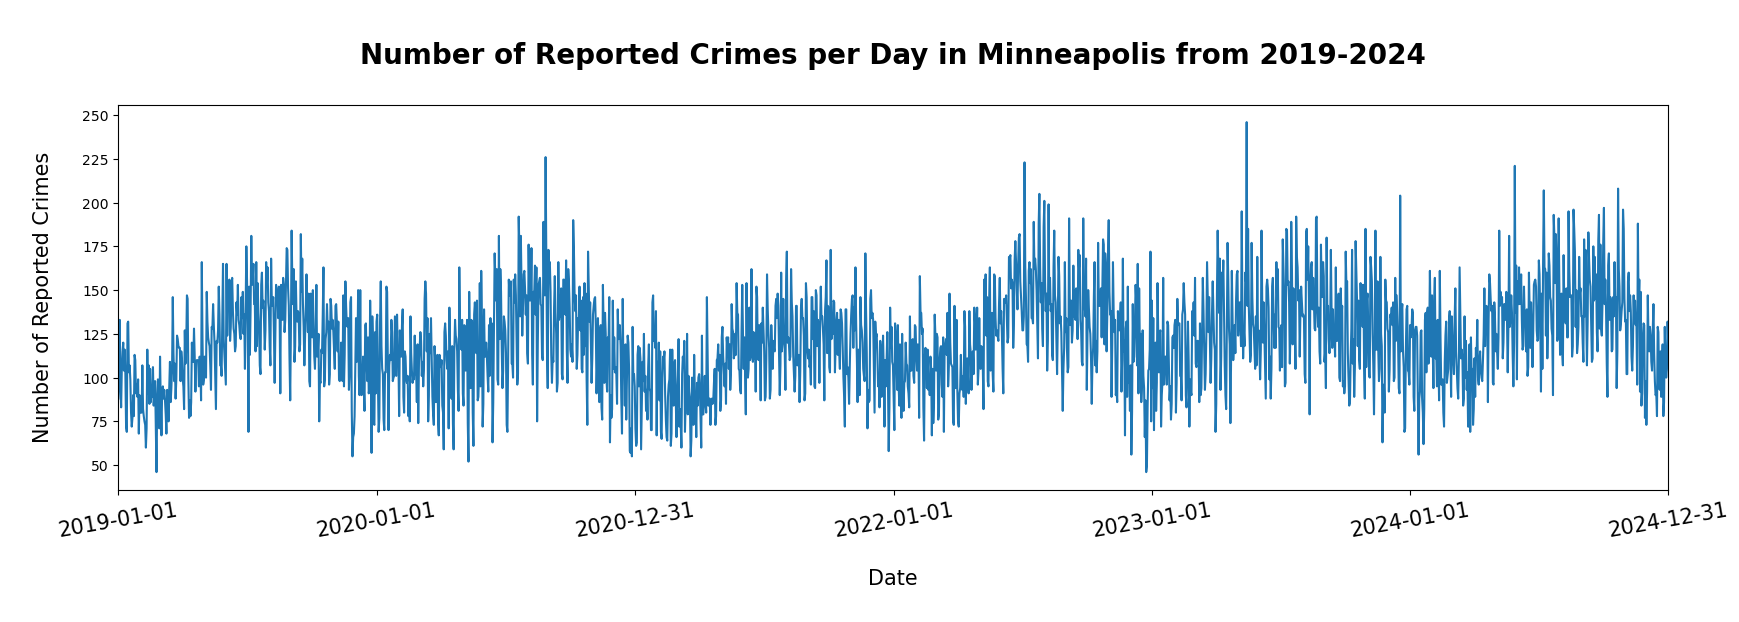

In [ ]:
fig, ax=plt.subplots(figsize=(20, 5))
ax.plot(dates['Date'], dates['Crime_Count'])
plt.xticks(rotation=10, fontsize=15)

years = mdates.YearLocator()  
ax.xaxis.set_major_locator(years)

ax.set_xlim('2019-01-01', '2024-12-31')
ax.set_title("\nNumber of Reported Crimes per Day in Minneapolis from 2019-2024\n",weight='bold',fontdict={'fontsize':20})
ax.set_xlabel("\nDate\n",fontdict={'fontsize':15})
ax.set_ylabel("\nNumber of Reported Crimes\n",fontdict={'fontsize':15})

plt.show()

## Summary statistics of each crime type per year 
Table

In [244]:
table = pd.pivot_table(df, values='Crime_Count', index=['Year'], aggfunc="sum")
table

,Crime_Count
Year,
2019,42722
2020,43480
2021,40414
2022,45425
2023,46768
2024,46984
2025,6958
